# Validação cruzada

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [61]:
import pickle
with open('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/01. Classificação /credit.pkl', 'rb') as f:
  X_credit_train, X_credit_test, y_credit_train, y_credit_test = pickle.load(f)

In [62]:
# Concatenando treino e teste
import numpy as np
X_credit = np.concatenate((X_credit_train, X_credit_test), axis = 0)
y_credit = np.concatenate((y_credit_train, y_credit_test), axis = 0 )

In [63]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

In [64]:
# Cada vez que executamos a validação cruzada, faremos 10 testes(fold ou n_splites= 10)
resultado_arvore = []
resultado_random_forest = []
resultado_knn = []
resultado_svm = []
resultado_logistica = []
resultado_redes_neurais = []
for i in range(30): # Vamos rodar 30 testes
  kfold = KFold(n_splits= 10, shuffle=True, random_state=i)# A bse de dados sera dividio em 10, 9 pedaços para treinamos e 1 para teste, rodando 10 testes

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv=kfold)
  resultado_arvore.append(scores.mean())

  randon_forest = RandomForestClassifier(criterion=  'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators=10)
  scores = cross_val_score( randon_forest, X_credit, y_credit, cv = kfold)
  resultado_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
  resultado_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol =0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
  resultado_logistica. append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
  resultado_svm. append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
  resultado_redes_neurais.append(scores.mean())



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [65]:
resultado_arvore

[0.9864999999999998,
 0.9844999999999999,
 0.9905000000000002,
 0.9875,
 0.9879999999999999,
 0.9890000000000001,
 0.9884999999999999,
 0.9875,
 0.9860000000000001,
 0.9869999999999999,
 0.9865,
 0.9899999999999999,
 0.9884999999999999,
 0.9864999999999998,
 0.9835,
 0.9854999999999998,
 0.9855,
 0.9904999999999999,
 0.9875,
 0.9869999999999999,
 0.984,
 0.9870000000000001,
 0.9889999999999999,
 0.9875,
 0.9870000000000001,
 0.9880000000000001,
 0.9875,
 0.9855,
 0.9864999999999998,
 0.9875]

In [66]:
import pandas as pd

resultados = pd.DataFrame({'arvore': resultado_arvore,
                          'random forest': resultado_random_forest,
                          'KNN': resultado_knn,
                          'logistica': resultado_logistica,
                          'SVM': resultado_svm,
                          'Rede Neural': resultado_redes_neurais})
resultados

,arvore,random forest,KNN,logistica,SVM,Rede Neural
0,0.9865,0.9825,0.9815,0.9475,0.9845,0.9970
1,0.9845,0.9805,0.9800,0.9465,0.9840,0.9980
2,0.9905,0.9835,0.9795,0.9470,0.9865,0.9970
3,0.9875,0.9820,0.9780,0.9460,0.9850,0.9965
4,0.9880,0.9855,0.9820,0.9465,0.9850,0.9975
5,0.9890,0.9830,0.9780,0.9465,0.9845,0.9965
6,0.9885,0.9875,0.9805,0.9470,0.9860,0.9960
7,0.9875,0.9840,0.9800,0.9480,0.9850,0.9970
8,0.9860,0.9815,0.9795,0.9465,0.9840,0.9960
9,0.9870,0.9830,0.9820,0.9465,0.9845,0.9965


In [67]:
resultados.describe() # std = desvio padrao

,arvore,random forest,KNN,logistica,SVM,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987183,0.983683,0.980050,0.946950,0.985083,0.996950
std,0.001709,0.002011,0.001533,0.000687,0.001280,0.000514
min,0.983500,0.980000,0.977000,0.945500,0.982000,0.996000
25%,0.986500,0.982000,0.979000,0.946500,0.984125,0.996500
50%,0.987250,0.983750,0.980000,0.947000,0.985000,0.997000
75%,0.988000,0.985500,0.981000,0.947500,0.986375,0.997375
max,0.990500,0.987500,0.982500,0.948500,0.987500,0.998000


In [68]:
(resultados.std() / resultados.mean()) * 100 # é o coeficiente de variação em porcentagem

arvore           0.173162
random forest    0.204403
KNN              0.156446
logistica        0.072517
SVM              0.129977
Rede Neural      0.051602
dtype: float64

# Teste de normalidade nos resultados

Os dados precisam estar na distribuição normal para conseguirmos realizar os testes de hipotese, iremos fazer os testes para determinar isso abaixo

In [69]:
resultados.head()

,arvore,random forest,KNN,logistica,SVM,Rede Neural
0,0.9865,0.9825,0.9815,0.9475,0.9845,0.9970
1,0.9845,0.9805,0.9800,0.9465,0.9840,0.9980
2,0.9905,0.9835,0.9795,0.9470,0.9865,0.9970
3,0.9875,0.9820,0.9780,0.9460,0.9850,0.9965
4,0.9880,0.9855,0.9820,0.9465,0.9850,0.9975


In [70]:
# Teste de Shapiro
alpha = 0.05


In [71]:
from scipy.stats import shapiro

precisa ser maior que o valor de alpha para ser normal

In [72]:
print(shapiro(resultado_arvore))
print(shapiro(resultado_random_forest))
print(shapiro(resultado_knn))
print(shapiro(resultado_svm))
print(shapiro(resultado_logistica))
print(shapiro(resultado_redes_neurais))

ShapiroResult(statistic=0.9718238711357117, pvalue=0.5901952385902405)
ShapiroResult(statistic=0.9520625472068787, pvalue=0.19193695485591888)
ShapiroResult(statistic=0.9584025144577026, pvalue=0.28181397914886475)
ShapiroResult(statistic=0.9622980356216431, pvalue=0.354146808385849)
ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786)
ShapiroResult(statistic=0.915473461151123, pvalue=0.02050033025443554)


Não podemos aplicar os testes de hipotese ás redes neurais

In [73]:
import seaborn as sns


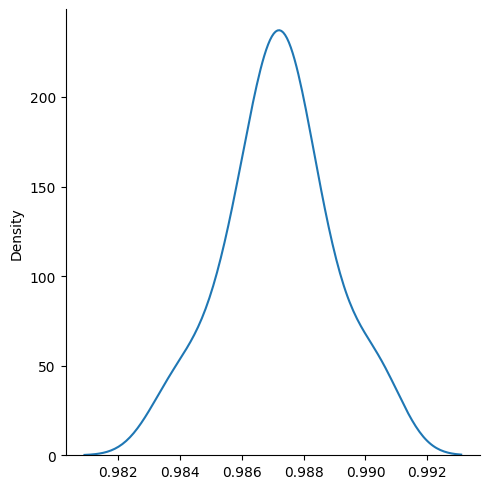

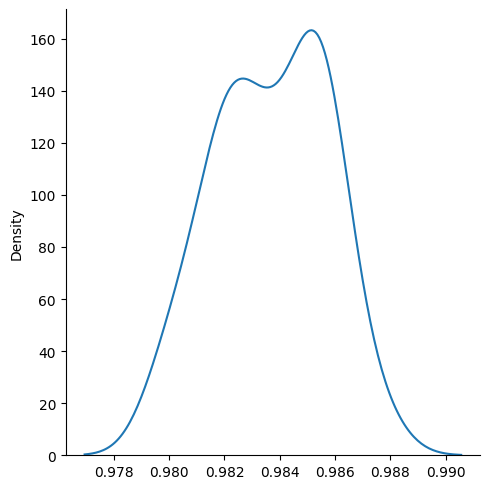

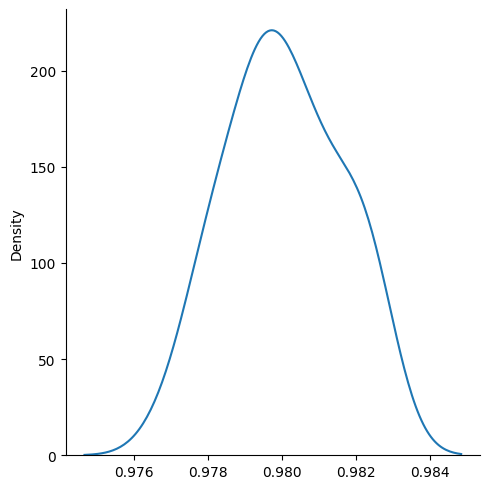

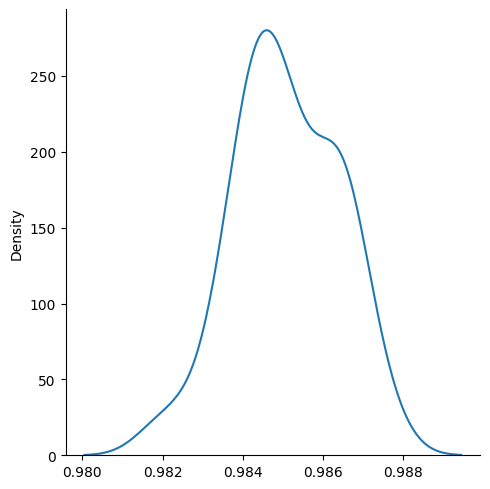

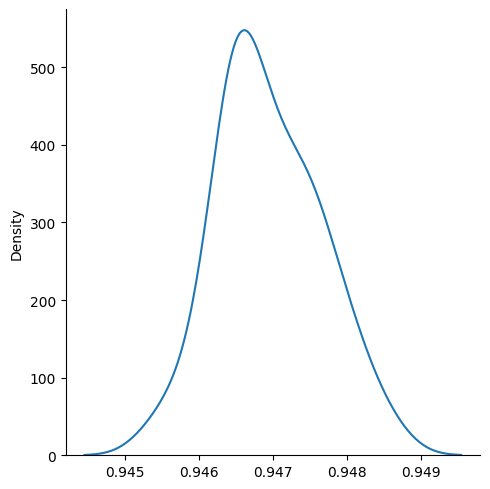

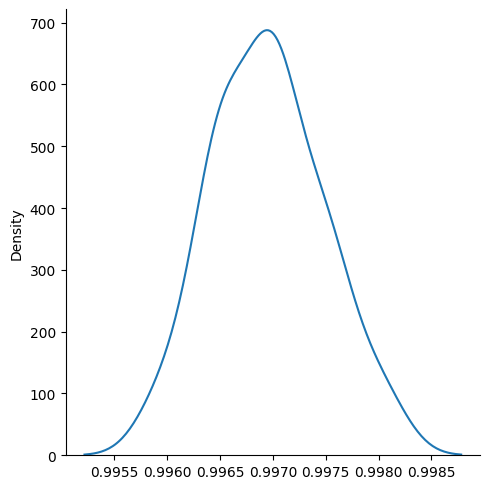

In [74]:
lista = [resultado_arvore, resultado_random_forest, resultado_knn, resultado_svm, resultado_logistica,resultado_redes_neurais ]
for c in lista:
    sns.displot(c, kind = 'kde') # Verificando como é o grafico e vendo se sao parecidas com curva normal



apesar de nao ser normal, a rede neural tem uma curva de sino, então vamos tentar aplicar o teste de hipotese nela tambem

# Testes de hipotese

Vamos ver se há uma diferença estatisticamente significativa entre os modelos com **ANOVA** e **TUKEY**

In [75]:
from scipy.stats import f_oneway

In [76]:
_, p = f_oneway(resultado_arvore, resultado_random_forest, resultado_knn, resultado_logistica, resultado_svm, resultado_redes_neurais)
p

3.562637301523381e-182

In [77]:
alpha = 0.05
if p <= alpha:
  print('h0 rejeitada, há uma diferença estatistica entre os dados')
else:
  print('h1 rejeitada, não há uma diferença entre os dados')

h0 rejeitada, há uma diferença estatistica entre os dados


há uma diferença significativa entre os resultados! logo, existe um algoritmo que é mais preciso que o outro nessa situação


In [78]:
# Agora vamos escolher o melhor modelo para usar
resultado_algoritmos = {'accurancy': np.concatenate([resultado_arvore, resultado_random_forest, resultado_knn, resultado_logistica, resultado_svm, resultado_redes_neurais]),
                        'algoritmo': ['arvore','arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
          'random_forest', 'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
          'knn', 'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
          'logistica', 'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
          'svm','svm', 'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
          'redes neurais', 'redes neurais','redes neurais', 'redes neurais', 'redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais','redes neurais']}


In [79]:
resultados_df = pd.DataFrame(resultado_algoritmos)
resultados_df

,accurancy,algoritmo
0,0.9865,arvore
1,0.9845,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9880,arvore
...,...,...
175,0.9975,redes neurais
176,0.9965,redes neurais
177,0.9970,redes neurais
178,0.9975,redes neurais


In [80]:
from statsmodels.stats.multicomp import MultiComparison

In [81]:
compara_algoritmos = MultiComparison(resultados_df['accurancy'], resultados_df['algoritmo'])

In [82]:
teste_estatisticos = compara_algoritmos.tukeyhsd()
print(teste_estatisticos)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn  -0.0071   0.0 -0.0082 -0.0061   True
       arvore     logistica  -0.0402   0.0 -0.0413 -0.0392   True
       arvore random_forest  -0.0035   0.0 -0.0045 -0.0025   True
       arvore redes neurais   0.0098   0.0  0.0087  0.0108   True
       arvore           svm  -0.0021   0.0 -0.0031 -0.0011   True
          knn     logistica  -0.0331   0.0 -0.0341 -0.0321   True
          knn random_forest   0.0036   0.0  0.0026  0.0047   True
          knn redes neurais   0.0169   0.0  0.0159  0.0179   True
          knn           svm    0.005   0.0   0.004  0.0061   True
    logistica random_forest   0.0367   0.0  0.0357  0.0378   True
    logistica redes neurais     0.05   0.0   0.049   0.051   True
    logistica           svm   0.0381   0.0  0.0371  0.0392   True
random_for

- TRUE -> rejeitamos h0, então há uma diferença significativa entre os dois algoritmos em questão
- Caso seja true, devemos escolher o estatisticamente superior, na grande maioria dos casos
- caso tenhamos um valor false, poderiamos escolher qualquer um dos algoritmos que daria na mesma


In [83]:
resultados.mean()

arvore           0.987183
random forest    0.983683
KNN              0.980050
logistica        0.946950
SVM              0.985083
Rede Neural      0.996950
dtype: float64

- como todos deram TRUE, pegamos o modelo que é estatisticamente melhor, nesse caso seria **redes neurais**
- podemos perceber isso no grafico abaixo

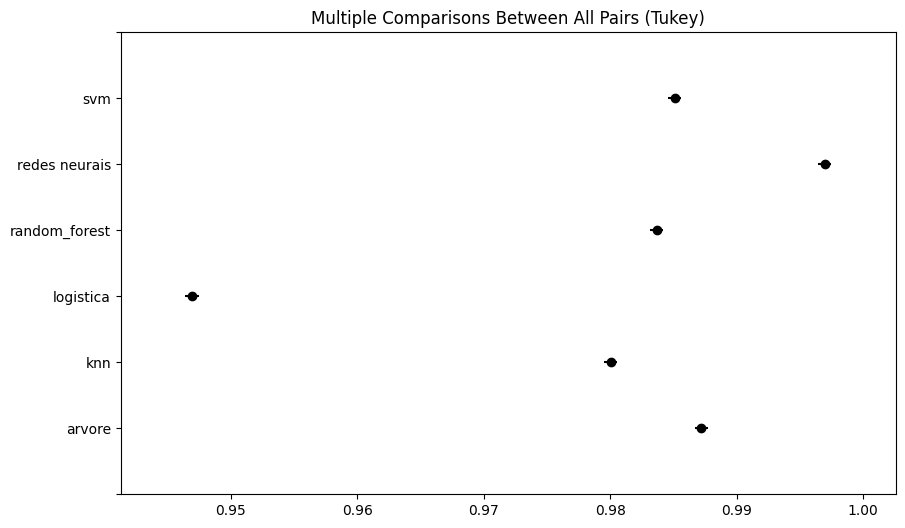

In [84]:
teste_estatisticos.plot_simultaneous(); #ele mostra as diferenças significativas entre as médias dos grupos.
# barras horizontais mostram os intervalos de confiança em torno das médias.

# Salvando um classificador

escolhemos o algoritmo de rede neural como o melhor

In [85]:
import pickle
with open('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/01. Classificação /credit.pkl', 'rb') as f:
  X_credit_train, X_credit_test, y_credit_train, y_credit_test = pickle.load(f)

In [86]:
# Concatenando treino e teste
import numpy as np
X_credit = np.concatenate((X_credit_train, X_credit_test), axis = 0)
y_credit = np.concatenate((y_credit_train, y_credit_test), axis = 0 )

In [87]:
rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
# Como ja testamos o nosso modelo, podemos passar a base completa para o treinamento final, pois nao há mais necessidade de teste
rede_neural.fit(X_credit, y_credit)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [88]:
arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [89]:
svm = SVC(kernel = 'rbf', C = 2.0, probability=True)
svm.fit(X_credit, y_credit)

SVC(C=2.0, probability=True)

In [90]:
pickle.dump(rede_neural, open('rede_neural_final.sav', 'wb'))
pickle.dump(arvore, open('arvore_final.sav', 'wb'))
pickle.dump(svm, open('svm.sav', 'wb'))

# Carregando um classificador

In [91]:
rede_neural = pickle.load(open('/content/rede_neural_final.sav', 'rb'))
arvore = pickle.load(open('/content/arvore_final.sav', 'rb'))
svm = pickle.load(open('/content/svm.sav', 'rb'))

Vamos testar os algoritmos carregados

In [92]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro

array([[-1.03572293, -0.93978122,  0.04244312]])

In [93]:
resposta_rede = rede_neural.predict(novo_registro)

In [94]:
resposta_arvore = arvore.predict(novo_registro)

In [95]:
resposta_svm = svm.predict(novo_registro)

In [96]:
resposta_rede, resposta_arvore, resposta_svm

(array([1]), array([1]), array([1]))

Respostas iguais para todos

# Combinação de classificadores

- Usamos varios classificadores em conjunto
- plutality -> Classe que tiver mais votos é considerada correta

In [97]:
paga = 0
nao_paga = 0

# Rede neural
if resposta_rede[0] == 1:
  nao_paga += 1
else:
  paga += 1

# Arvore
if resposta_arvore[0] == 1:
  nao_paga += 1
else:
  paga += 1

# svm
if resposta_svm[0] == 1:
  nao_paga += 1
else:
  paga += 1

# Vendo a maioria

if paga> nao_paga:
  print('O cliente pagara o emprestimo')
elif nao_paga > paga:
  print('O cliente NÃO pagara o emprestimo')
else:
  print('Empate')

O cliente NÃO pagara o emprestimo


# Rejeição de classificadores

Iremos rejeitar a previção caso o modelo nao tenha certeza suficiente

In [98]:
probabilidade_rede = rede_neural.predict_proba(novo_registro)
confianca_rede_neural = probabilidade_rede.max()
confianca_rede_neural

0.9999474048517176

quase 100% de certeza para a primeira classe

In [99]:
probabilidade_arvore = arvore.predict_proba(novo_registro)
confianca_arvore = probabilidade_arvore.max()
confianca_arvore

1.0

In [100]:
probabilidade_svm = svm.predict_proba(novo_registro)
confianca_svm = probabilidade_svm.max()
confianca_svm

0.99208550152025

In [101]:
# So vamos considerar as previsoes dos algoritmos que tenham uma confiança maior ou igual ao limiar previamente definido
paga = 0
nao_paga = 0
confianca_minima = 0.9999999 # Depende completamente da aplicação
algoritmos = 0 # Conta quantos algoritmos foram utilizados

# Rede neural
if confianca_rede_neural >= confianca_minima:
  algoritmos += 1
  if resposta_rede[0] == 1:
    nao_paga += 1
  else:
    paga += 1

# Arvore
if confianca_arvore >= confianca_minima:
  algoritmos += 1
  if resposta_arvore[0] == 1:
    nao_paga += 1
  else:
    paga += 1

# svm
if confianca_svm >= confianca_minima:
  algoritmos += 1
  if resposta_svm[0] == 1:
    nao_paga += 1
  else:
    paga += 1

# Vendo a maioria
if(algoritmos <= 0 ):
  print('Nenhom algoritmo teve certeza suficiente para determinar a resposta')
else:
  if paga> nao_paga:
    print(f'O cliente pagara o emprestimo, baseado em {algoritmos} algoritmo(s)')
  elif nao_paga > paga:
    print(f'O cliente NÃO pagara o emprestimo baseado em {algoritmos} algoritmo(s)')
  else:
    print('Empate')

O cliente NÃO pagara o emprestimo baseado em 1 algoritmo(s)
